In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import transpile
#from qiskit.providers.aer import AerSimulator
%matplotlib inline

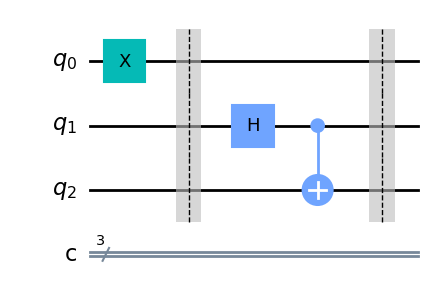

In [2]:
circuit = QuantumCircuit (3,3) # 3 qubits, 3 classical bits

circuit.x(0)  # apply X-gate to q0 --> |Psi> qubit

circuit.barrier()   # apply a barrier after X-gate

circuit.h(1)   # apply Hadamrd gate to q1
circuit.cx(1,2)   # apply CNOT gate to q1 and q2

circuit.barrier()   # apply a barrier after Bell State

circuit.draw(output = 'mpl')   # draw the circuit

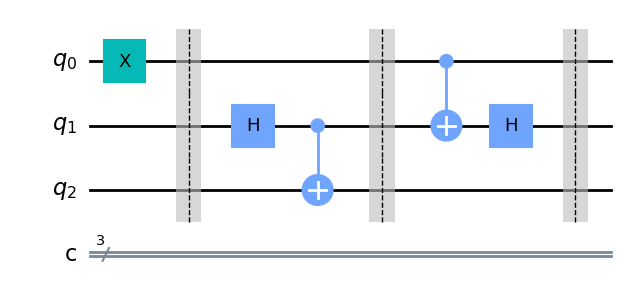

In [3]:
# Let's do a reversed Bell State on q0 and q1

circuit.cx(0,1)  # apply CNOT gate on q0 and q1
circuit.h(1)    # apply a Hadamard gate on q0

circuit.barrier()

circuit.draw(output = 'mpl')

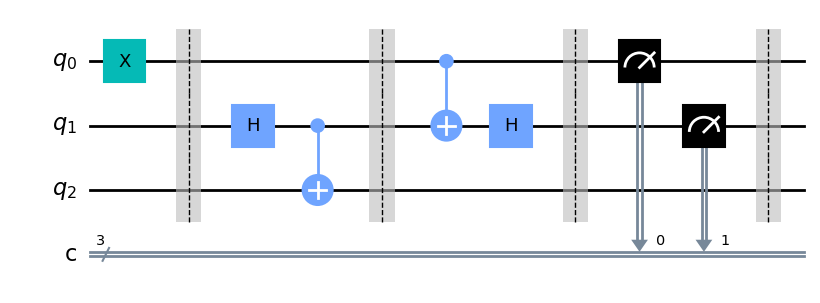

In [4]:
# Let's measure q0 and q1

circuit.measure([0,1], [0,1])

circuit.barrier()

circuit.draw(output = 'mpl')

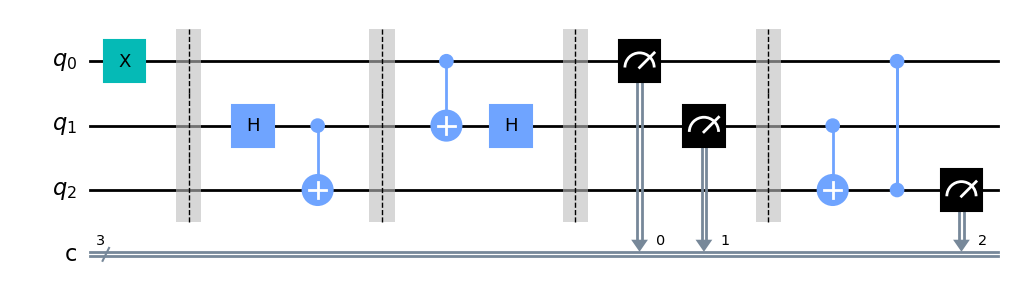

In [5]:
# We don't know the values of q0 and q1, so we use cx and cz gates to control the result that we will get.

# Both gates act on q2.
# If q1, is equal to 1, then it will perform a NOT gate on q2.
# If q0 is equalt to 1, then it will perform a Z-gate (phase flip) on q2.
# Thats a way to apply the x and z gates to q2.

circuit.cx(1,2)
circuit.cz(0,2)

circuit.measure([2], [2])
circuit.draw(output = 'mpl')

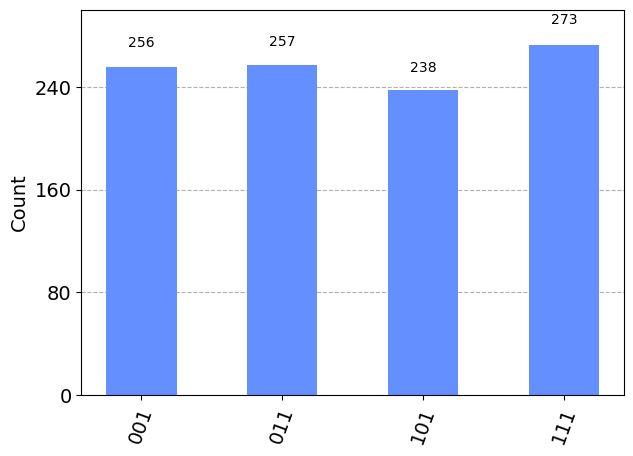

In [6]:
# Choose the Aer simulator backend
backend = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the chosen backend
transpiled_circuit = transpile(circuit, backend)

# Execute the circuit on the chosen backend
job = backend.run(transpiled_circuit)

# Get the result from the job
result = job.result()

# Plot the histogram of the results
plot_histogram(result.get_counts(circuit))